# Business Case Study: Employee Performance & Attrition 

This report will work as an example of the processes that should be applied along with the stages and mindset when it comes to managing ongoing: 
<li>Employee Attrition
<li>Employee Performance Issues
    
The data used for the analysis derive from the Sample IBM Dataset available in Kaggle.com 

<center><i>You don't build a business. You build people, and people build the business." - Zig Ziglar</i></center>

<b><hr></b></hr>

<img src="https://2firkl1qsbue2ashgy21ze4i-wpengine.netdna-ssl.com/wp-content/uploads/2016/09/How-to-Avoid-Discrimination-when-Promoting-Employees-640x302.png" width="750" align="center">

## Section 1: Employee Attrition 

<u>Introduction</u>

The issue of keeping one's employees happy and satisfied is a perennial and age-old challenge. If an employee you have invested so much time and money leaves for "greener pastures", then this would mean that you would have to spend even more time and money to hire somebody else. In the spirit of Kaggle, let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.



This notebook is structured as follows:

<p> <li><b>Exploratory Data Analysis</b> : In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other and create some Seaborn and Plotly visualisations.</p>
    
 <p><li><b>Feature Engineering and Categorical Encoding</b> : Conduct some feature engineering as well as encode all our categorical features into dummy variables.</p>
     
 <p><li><b>Implementing Machine Learning models</b> : We implement a Random Forest and a Gradient Boosted Model after which we look at feature importances from these respective models</p>

<u>Business Problem</u>

Our friend's company is about to get bankrupt and he wants to find out the reason why his employees are leaving


<img src="https://www.clearpeaks.com/wp-content/uploads/2019/05/Advanced-analytics-Employee-Attrition-1200-630.jpg" width="750" align="center">

<u>Client</u>

Our Friend Mark

<u>Objective</u>

The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.

<u>OSEMN Pipeline</u>

I’ll be following a typical data science pipeline, which is call “OSEMN” (pronounced awesome).
<ol>
    <li><p><b>O</b>btaining the data is the first approach in solving the problem.</p>

<li><p><b>S</b>crubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.</p>

<li><b>E</b>xploring the data will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

<li><b>M</b>odeling the data will give us our predictive power on whether an employee will leave.

<li><b>I</b>nterpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found?


<u><b>Note</u></b>: The data was found from the “Human Resources Analytics” dataset provided by Kaggle’s website. https://www.kaggle.com/ludobenistant/hr-analytics

<hr></hr>

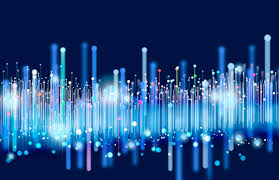

## Part 1: Obtaining the data

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [7]:
from pandas import read_csv
data = read_csv("/Users/konstantinosanastasiadis/Coursera Notebooks Python/Python Data Analytics/hrdataset.csv")

## Part 2: Scrubbing the data

<i>Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.</i>

In [8]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

<i><b>Initial Overview of the Dataset - Let us go throgh some functions and get an overview of how are dataset is designed</i></b>

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
# Display the statistical overview of the employees
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<u>Demographic and Quick insights</u>

Based on the quick <b>data.describe</b> method we can have a quick overview of our dataset. The following can be traced wihin our dataframe. 
<ol>
    <li> <b>Age</b>: Our average employee is around 36 years old while 70% of our employees within the sample have an average age of 43
    <li> <b>Distance from Home</b>: Around 9km - this is the average distance that our employee is from the offices
    <li> <b>TotalWorkingYears & Years at company in healthy levels</b> Majority of the employees 75th percentile has a work experience of 15 years with the majority of their experience existing within the current organization 
     <li> <b>YearsSinceLastPromotion healthy levels</b>Between 3-4 years majority of the employees are being promoted to higher levels within the organization - indicating a healthy environment with a flexible rotation. 
</ol>
<u>Employee Evaluation 1-4 Scale</u>
<ol>
    <li> <b>Relationship Satisfaction,Environment Satisfaction, Job Involvement,Work/Life balance High Level</b>Majority of the employees on the 75th Percentile rates as 4 with the 50th Percentile rating it at 3 indicating a healthy workforce as an initial overview
  </ol>
  
  <u>Overall Conclusions</u>
<li><b>Demographic</b>:Majority of the employees have been with the organization for a long period of time and and almost 60% of their work experience derives from it. 
<li><b>Perception to the Organization</b>: There is a positive outlook through all the pillars which is still pending to be further explored (Relationship Satisfaction, Environment Satisfaction and Job involvement)   
    
 <u>However</u>
 <p>We have to further explore the correlations between those indicators and the employees that left the organization
    <li>Training - How many training have been provided and has this lead to people living? 
    <li>Outliers - Do the extreme values in our indicators correlate with people living the organization? 
    <li> Limits - Is there some limit that when this is surpassed leads our employees to leaving the organization? 


<img src="https://blog.contactcenterpipeline.com/wp-content/uploads/2019/05/PM201904-blog.png" width="750" align="center">

## Part 3: Exploring the Data

### <b>3a: Statistical Overview</b>

Based on describe add some notifications that come out of the describe function

In [31]:
data.Attrition = pd.Categorical(data.Attrition).codes

In [11]:
# The dataset contains 10 columns and 14999 observations
data.shape

(1470, 35)

In [32]:
# Check the type of our features. 
data.dtypes

Age                          int64
Attrition                     int8
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [13]:
# Looks like about 83% of employees stayed and 16% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = data.Attrition.value_counts() / len(data)
turnover_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Fact: About <b>83% of employees stayed</b> and <b>16% of employees left.</b> 


In [14]:
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = data.groupby('Attrition')
turnover_Summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Going through really quick through the Turnover Summary dataframe:
    <li>Employees that leave the organization were <b>payed less, had a low evaluation through both the Work/Life balance and Work-related indicators</b></li>
<li>However, it seems that these employees were <b>performing better</b>with a small difference (+0,003) than those who remained further exploration is to be done</li>

### <b>3b: Correlation Matrix & Heatmap</b>

Moderate Positively Correlated Features:

<li>PerformanceRating vs JobSatisfaction: 0.002299
<li>JobSatisfaction vs Monthly Salary: 0.002297
<li>Moderate Negatively Correlated Feature:

JobSatisfaction vs attrition: -0.103
PerformanceRating vs Monthly Salary: -0.002347

Stop and Think:

What features affect our target variable the most (turnover)?
What features have strong correlations with each other?
Can we do a more in depth examination of these features?
Summary:

From the heatmap, there is a positive(+) correlation between PerformanceRating, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours  were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.031882,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.472198,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.063991,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.196165,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,0.007109,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.015943,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,0.007109,1.000000,0.017225,0.007996,NaN,-0.010895,-0.019395,-0.004144,-0.024586,0.101963,0.021001,0.157526,0.023642,-0.035882,-0.007840,-0.024604,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.004985,0.017225,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,0.011962,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.007996,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.124561,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,-0.010895,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,0.000604,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.019395,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.015259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,-0.004144,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.019680,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123


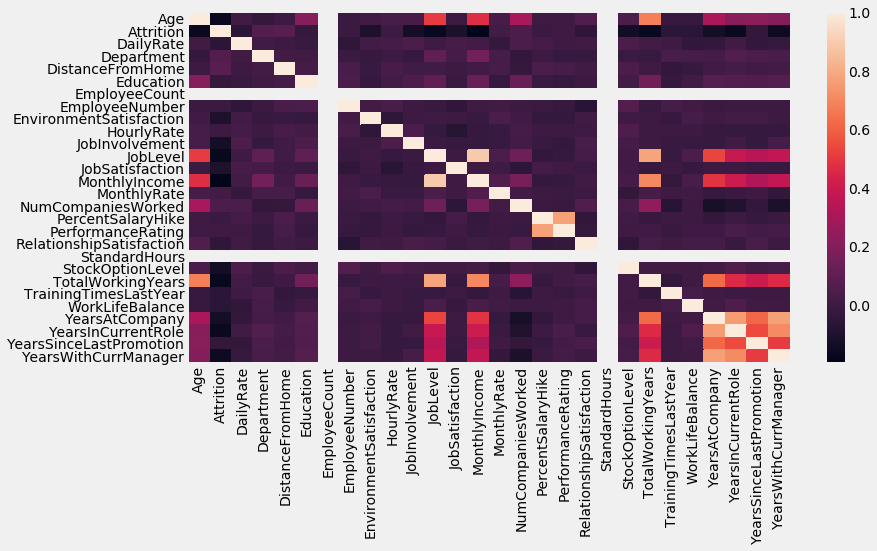

In [67]:
#Correlation Matrix
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

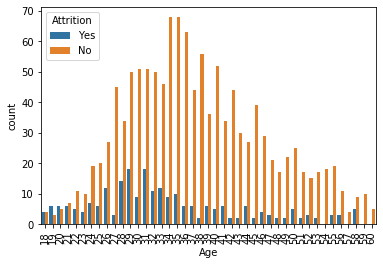

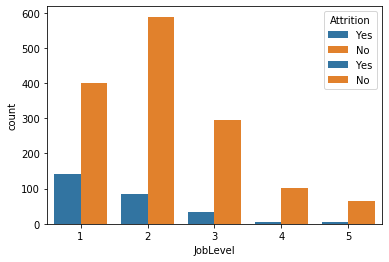

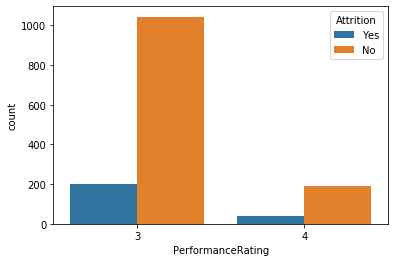

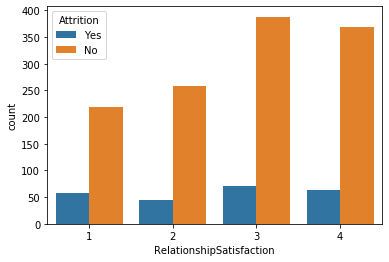

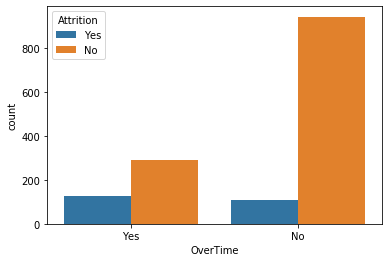

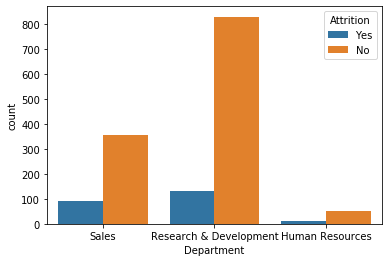

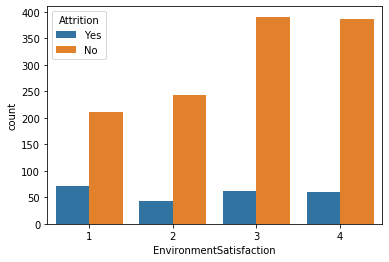

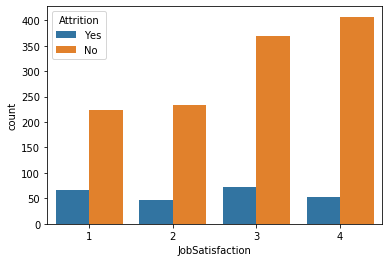

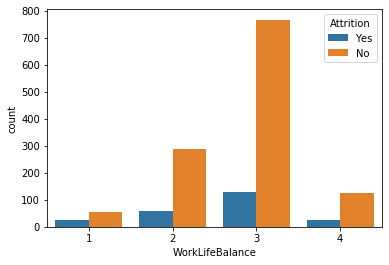

<Figure size 432x288 with 0 Axes>

In [16]:
#Count Plot

#Age vs attrition


sns.countplot(x=data['Age'], hue="Attrition", data=data) 
plt.xticks( rotation=90)
plt.show()

#Multiple Count plots
#Marital status,Performace rating, Job Level,   Relationship Satisfaction, Over Time, Department, Environmental Satisfaction , job Satisfaction, Work life Balace




# create a data frame to store all required columns

data_df1=pd.DataFrame(data[['MaritalStatus','PerformanceRating','JobLevel','RelationshipSatisfaction','OverTime','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']])

for i, col in enumerate(data_df1.columns):
	sns.countplot(x=col, hue='Attrition',data=data)	
	plt.figure(i)

<img src="https://cdn.lynda.com/course/196583/196583-637274008157865211-16x9.jpg" width="750" align="center">

<b>Observation: Attrition rate is more for Job level 1 & 2 and in Reaserch Department. Midlevel Age group 25-35 has major attrition rate.</b>

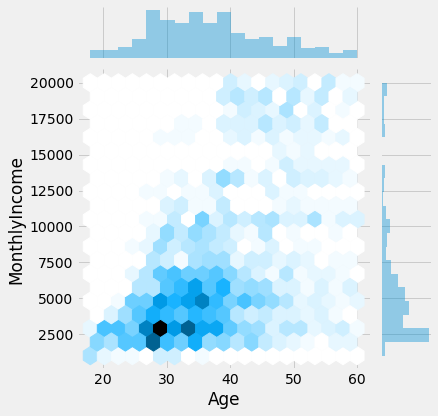

In [71]:
# joint Plots
sns.jointplot(data.Age,data.MonthlyIncome, kind = "hex")   
plt.show()

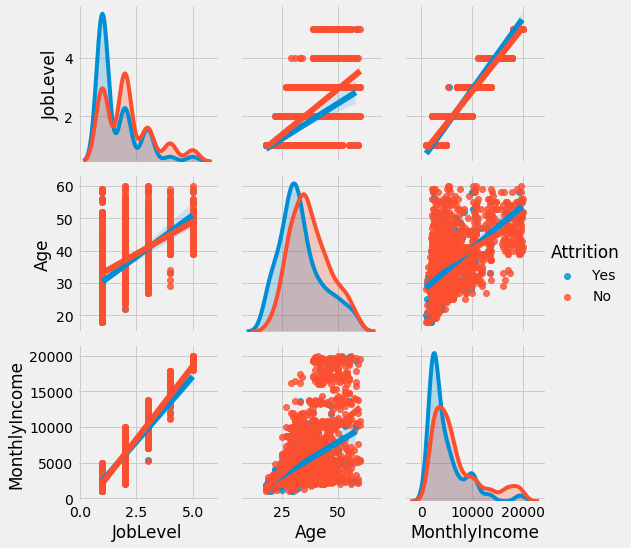

In [72]:
#Pair Plots
cont_col= ['Attrition','JobLevel','Age','EducationField','MonthlyIncome']
sns.pairplot(data[cont_col],  kind="reg", diag_kind = "kde"  , hue = 'Attrition' )
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


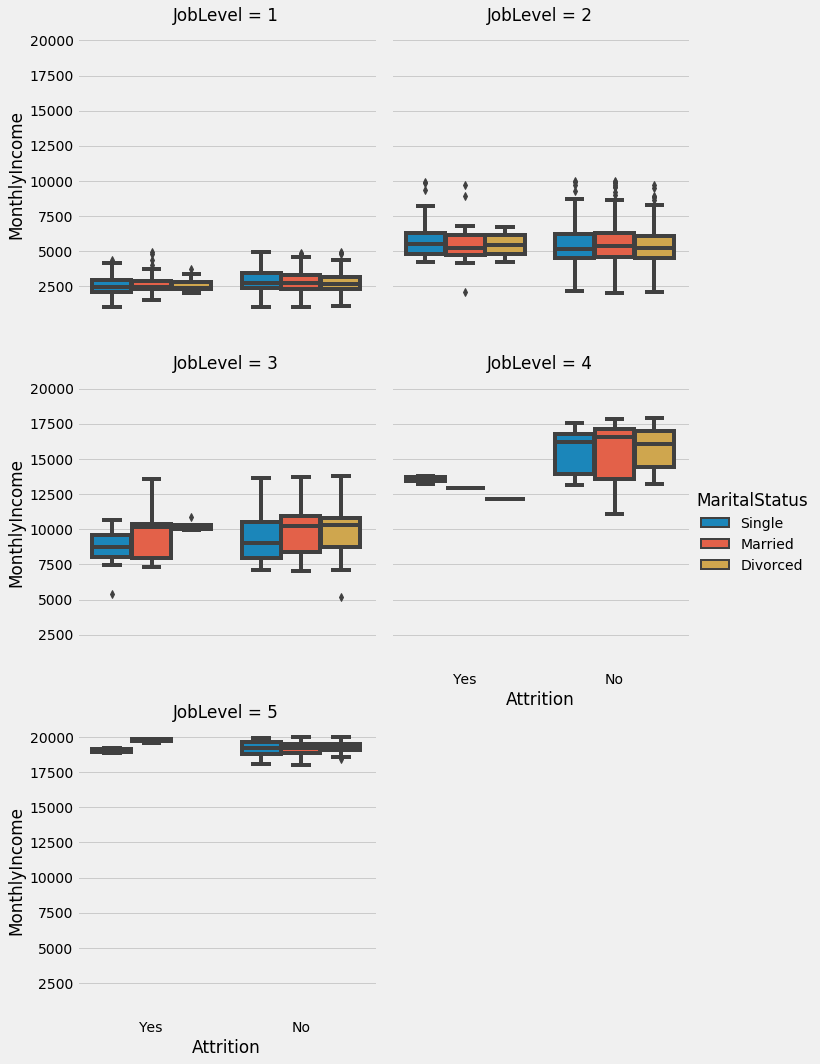

In [73]:
#Factor plots
sns.factorplot(x =   'Attrition',
               y =   'MonthlyIncome',
               hue = 'MaritalStatus',
               col=  'JobLevel',   
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = data)
plt.show()

### <b>3c: Statistical Test for Correlation</b>

One-Sample T-Test (Measuring Satisfaction Level)
A one-sample t-test checks whether a sample mean differs from the population mean. Since satisfaction has the highest correlation with our dependent variable turnover, let's test to see whether the average satisfaction level of employees that had a turnover differs from the those that had no turnover.

Hypothesis Testing: Is there significant difference in the means of satisfaction level between employees who had a turnover and temployees who had no turnover?

<li>Null Hypothesis: (H0: pTS = pES) The null hypothesis would be that there is no difference in satisfaction level between employees who did turnover and those who did not..

<li>Alternate Hypothesis: (HA: pTS != pES) The alternative hypothesis would be that there is a difference in satisfaction level between employees who did turnover and those who did not..

In [38]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
#emp_population = df['satisfaction'].mean()
emp_population = data['JobSatisfaction'][data['Attrition'] == 0].mean()
emp_turnover_satisfaction = data[data['Attrition']==1]['JobSatisfaction'].mean()

print( 'The mean satisfaction for the employee population with no turnover is: ' + str(emp_population))
print( 'The mean satisfaction for employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean satisfaction for the employee population with no turnover is: 2.778588807785888
The mean satisfaction for employees that had a turnover is: 2.4683544303797467


Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population. To conduct a one sample t-test, we can use the stats.ttest_1samp() function:

In [39]:
import scipy.stats as stats
stats.ttest_1samp(a=  data[data['Attrition']==1]['JobSatisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Who Had No Turnover satisfaction mean

Ttest_1sampResult(statistic=-4.271690411128338, pvalue=2.814281106863117e-05)

T-Test Result

The test result shows the test statistic "t" is equal to -4.27. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():

T-Test Quantile

If the t-statistic value we calculated above (-51.33) is outside the quantiles, then we can reject the null hypothesis

In [40]:
degree_freedom = len(data[data['Attrition']==1])

LQ = stats.t.ppf(0.025,degree_freedom)  # Left Quartile

RQ = stats.t.ppf(0.975,degree_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(LQ))
print ('The t-distribution right quartile range is: ' + str(RQ))

The t-distribution left quartile range is: -1.9700240104025675
The t-distribution right quartile range is: 1.970024010402567


One-Sample T-Test Summary


T-Test = -51.33 | P-Value = 0.000_ | Reject Null Hypothesis
Question: How come the P-Value is literally 0.0? Can anybody answer this?
Reject the null hypothesis because:

T-Test score is outside the quantiles
P-value is lower than confidence level of 5%
Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of 0.00_ at a 5% confidence level is a good indicator to reject the null hypothesis.

But this does not neccessarily mean that there is practical significance. We would have to conduct more experiments or maybe collect more data about the employees in order to come up with a more accurate finding.

<hr></hr>

3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)

Summary: Let's examine the distribution on some of the employee's features. Here's what I found:

<li>Satisfaction - There is a huge spike for employees with low satisfaction and high satisfaction.
<li>Evaluation - There is a bimodal distrubtion of employees for low evaluations (less than 0.6) and high evaluations (more than 0.8)
<li>AverageMonthlyHours - There is another bimodal distribution of employees with lower and higher average monthly hours (less than 150 hours & more than 250 hours)
<li>The evaluation and average monthly hour graphs both share a similar distribution.
<li>Employees with lower average monthly hours were evaluated less and vice versa.
If you look back at the correlation matrix, the high correlation between evaluation and averageMonthlyHours does support this finding.

Stop and Think:

Is there a reason for the high spike in low satisfaction of employees?
Could employees be grouped in a way with these features?
Is there a correlation between evaluation and averageMonthlyHours?

Text(0, 0.5, 'Employee Count')

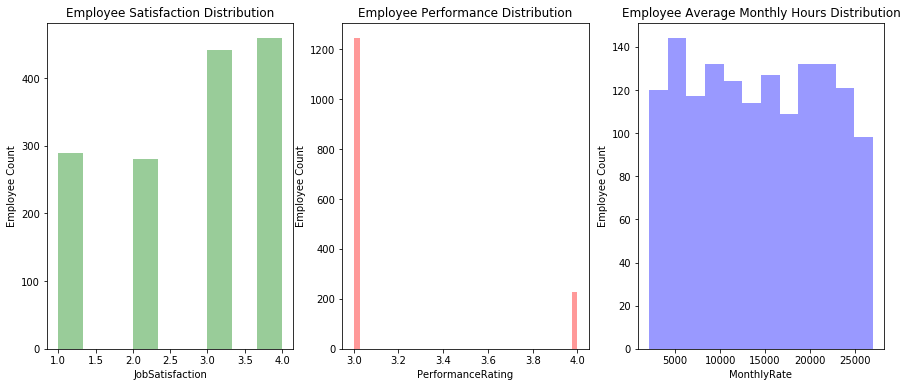

In [41]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(data.JobSatisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(data.PerformanceRating, kde=False, color="r", ax=axes[1]).set_title('Employee Performance Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(data.MonthlyRate, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

<img src="https://2firkl1qsbue2ashgy21ze4i-wpengine.netdna-ssl.com/wp-content/uploads/2016/09/How-to-Avoid-Discrimination-when-Promoting-Employees-640x302.png" width="750" align="center">

3d. Salary V.S. Turnover

Summary: This is not unusual. Here's what I found:

Majority of employees who left either had low or medium salary.
Barely any employees left with high salary
Employees with low to average salaries tend to leave the company.
Stop and Think:

What is the work environment like for low, medium, and high salaries?
What made employees with high salaries to leave?

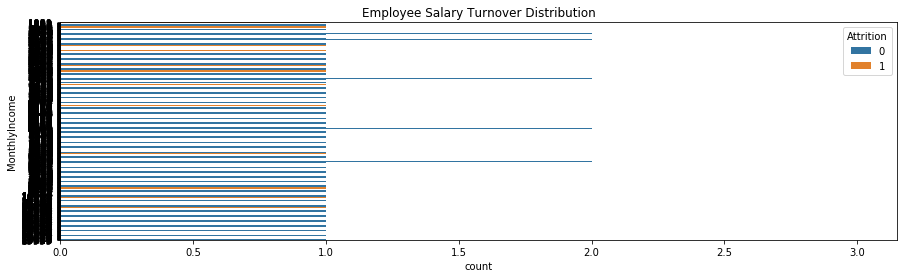

In [43]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="MonthlyIncome", hue='Attrition', data=data).set_title('Employee Salary Turnover Distribution');

3e. Department VS Turnover
Summary: Let's see more information about the departments. Here's what I found:

The sales, technical, and support department were the top 3 departments to have employee turnover
The management department had the smallest amount of turnover
Stop and Think:

If we had more information on each department, can we pinpoint a more direct cause for employee turnover?

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

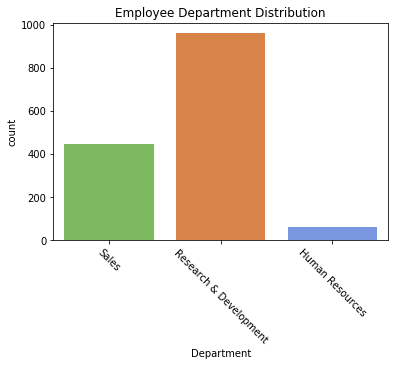

In [44]:
# Employee distri
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=data, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

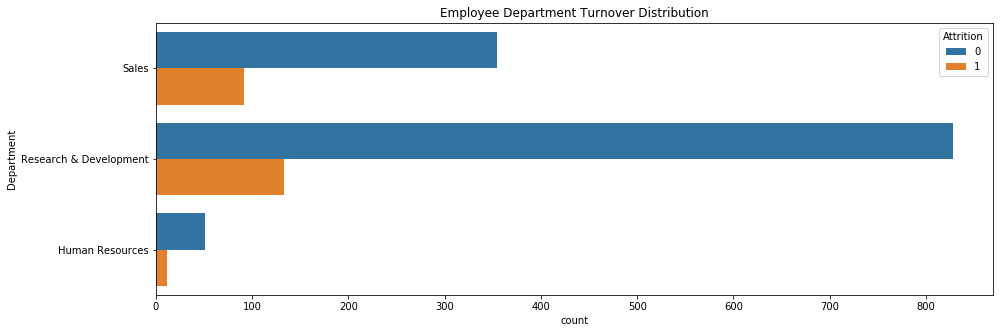

In [46]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='Attrition', data=data).set_title('Employee Department Turnover Distribution');

3f. Turnover V.S. Performance Rating
Summary: This graph is quite interesting as well. Here's what I found:

Majority of the employees that left the organization were rated as good performers (3&4)
There were no employees that left the organization and had an evaluation lower than 3 

Why are employees leaving at the lower/higher spectrum of performance rating?
Does this means that employees with performance rating 3 or 4 are not worked hard enough or are not highly valued, thus leaving the company?
Do employees with 4 rating are getting overworked, thus leaving the company?

[Text(0, 0.5, 'Percent')]

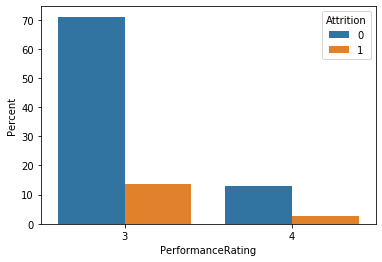

In [48]:
ax = sns.barplot(x="PerformanceRating", y="PerformanceRating", hue="Attrition", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

3g. Turnover V.S. Job Involvement
Summary:

There is a biomodal distribution for those that had a turnover.
Employees with low performance tend to leave the company more
Employees with high performance tend to stay within the Organization
The sweet spot for employees that stayed is within 2.5-3.5 evaluation

Text(0.5, 1.0, 'Employee Job Involvement Distribution - Turnover V.S. No Turnover')

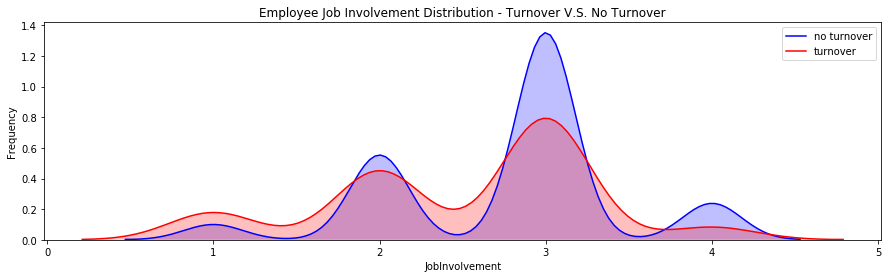

In [50]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(data.loc[(data['Attrition'] == 0),'PerformanceRating'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(data.loc[(data['Attrition'] == 1),'JobInvolvement'] , color='r',shade=True, label='turnover')
ax.set(xlabel='JobInvolvement', ylabel='Frequency')
plt.title('Employee Job Involvement Distribution - Turnover V.S. No Turnover')

3h. Turnover V.S. AverageMonthly Income
Summary:

Another bi-modal distribution for employees that turnovered
Employees who had less hours of work (~150hours or less) left the company more
Employees who had too many hours of work (~250 or more) left the company
Employees who left generally were underworked or overworked.

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

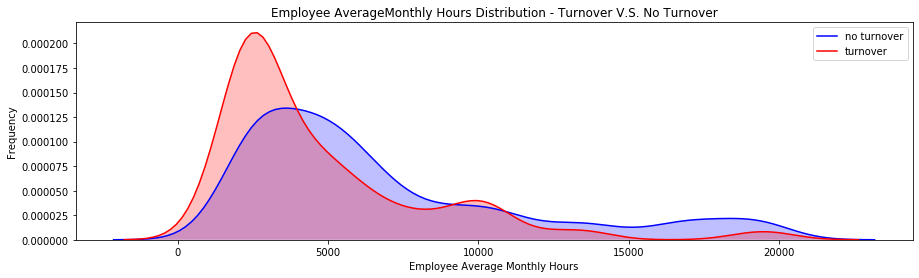

In [54]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Attrition'] == 0),'MonthlyIncome'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(data.loc[(data['Attrition'] == 1),'MonthlyIncome'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

3i. Turnover V.S. WorkLife Balance
Summary:

There is a tri-modal distribution for employees that turnovered
Employees who had really low satisfaction levels (0.2 or less) left the company more
Employees who had low satisfaction levels (0.3~0.5) left the company more
Employees who had really high satisfaction levels (0.7 or more) left the company more

Text(0.5, 1.0, 'Employee Work Life Balance Distribution - Turnover V.S. No Turnover')

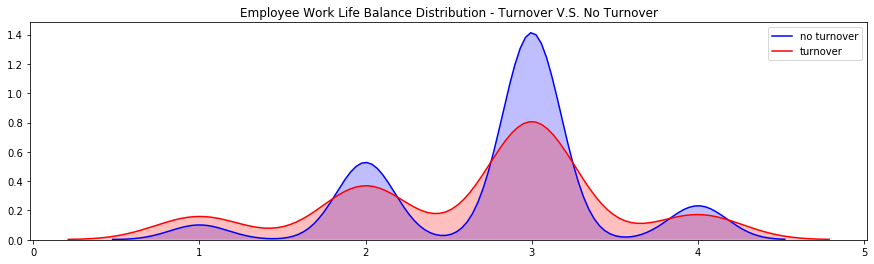

In [55]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Attrition'] == 0),'WorkLifeBalance'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(data.loc[(data['Attrition'] == 1),'WorkLifeBalance'] , color='r',shade=True, label='turnover')
plt.title('Employee Work Life Balance Distribution - Turnover V.S. No Turnover')

3j. PerformanceRating VS AverageMonthlyHours
Summary:

As project count increased, so did average monthly hours
Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.
Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects
In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects
Stop and Think:

What could be the meaning for this?
Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

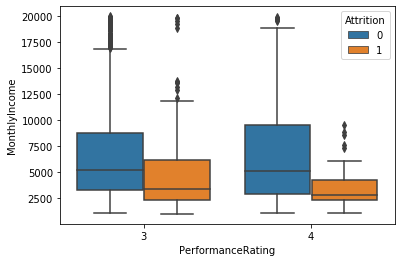

In [58]:
#PerformanceRating VS Monthly Income [BOXPLOT]
#Looks like the average employees who stayed had a monthly income of about 5.000-10.000. Those that had a turnover were being less payed in both performance levels by 3.000-4.000

import seaborn as sns
sns.boxplot(x="PerformanceRating", y="MonthlyIncome", hue="Attrition", data=data)

3l. Satisfaction VS Evaluation
Summary: This is by far the most compelling graph. This is what I found:

There are 3 distinct clusters for employees who left the company
Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Question: What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?
Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Question: Could this cluster mean employees who "under-performed"?
Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

Question: Could this cluser mean that employees left because they found another job opportunity?

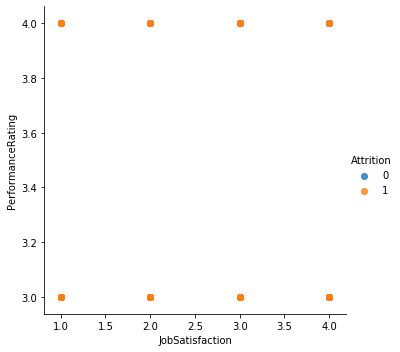

In [60]:
sns.lmplot(x='JobSatisfaction', y='PerformanceRating', data=data,
           fit_reg=False, # No regression line
           hue='Attrition')   # Color by evolution stage

3m. Turnover V.S. YearsAtCompany
Summary: Let's see if theres a point where employees start leaving the company. Here's what I found:

More than half of the employees with 4 and 5 years left the company
Employees with 5 years should highly be looked into
Stop and Think:

Why are employees leaving mostly at the 3-5 year range?
Who are these employees that left?
Are these employees part-time or contractors?

[Text(0, 0.5, 'Percent')]

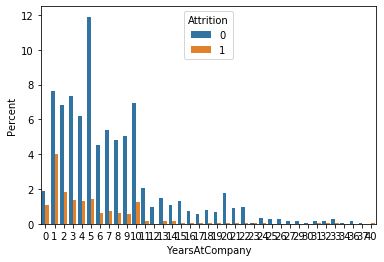

In [62]:
ax = sns.barplot(x="YearsAtCompany", y="YearsAtCompany", hue="Attrition", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")

3n. K-Means Clustering of Employee Turnover
Cluster 1 (Blue): Hard-working and Sad Employees

Cluster 2 (Red): Bad and Sad Employee

Cluster 3 (Green): Hard-working and Happy Employee

Clustering PROBLEM:

- How do we know that there are "3" clusters?
- We would need expert domain knowledge to classify the right amount of clusters
- Hidden uknown structures could be present

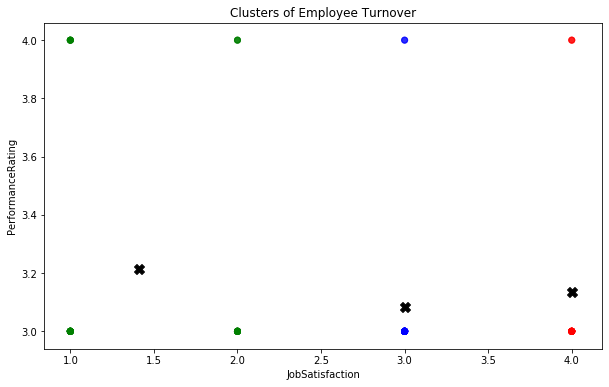

In [65]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(data[data.Attrition==1][["JobSatisfaction","PerformanceRating"]])

kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="JobSatisfaction",y="PerformanceRating", data=data[data.Attrition==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("JobSatisfaction")
plt.ylabel("PerformanceRating")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

<u>Potential Solution</u>
<p>Binary Classification: Turnover V.S. Non Turnover

Instance Scoring: Likelihood of employee responding to an offer/incentive to save them from leaving.

Need for Application: Save employees from leaving

In our employee retention problem, rather than simply predicting whether an employee will leave the company within a certain time frame, we would much rather have an estimate of the probability that he/she will leave the company. We would rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.

Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire. Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

<u>Solution 1</u>:

We can rank employees by their probability of leaving, then allocate a limited incentive budget to the highest probability instances.
OR, we can allocate our incentive budget to the instances with the highest expected loss, for which we'll need the probability of turnover.
Solution 2: Develop learning programs for managers. Then use analytics to gauge their performance and measure progress. Some advice:

Be a good coach
Empower the team and do not micromanage
Express interest for team member success
Have clear vision / strategy for team
Help team with career development

<img src="https://www.hipac.gr/images/article-images/htp.jpg" width="890" align="center">

## Recommended Websites:
Statiscal Concepts: https://www.youtube.com/user/BCFoltz/playlists

Common Machine Learning Algorithms: https://www.linkedin.com/pulse/machine-learning-whats-inside-box-randy-lao/

Basics of Machine Learning: https://www.linkedin.com/pulse/machine-learning-fresh-bloods-randy-lao/

Data Science Pipeline (OSEMN): https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/

<img src="https://lh3.googleusercontent.com/fqYJHtyzZzA4vacRzeJoB93QNvA5-mvR-8UB5oVLxdYDSTpfLp_KgYD4IqVGJUgFEJo" width="550" align="center">

## Let's Connect!
If anybody would like to discuss any other projects or just have a chat about data science topics, I'll be more than happy to connect with you on:

LinkedIn: https://www.linkedin.com/in/randylaosat/

My Website: http://randylaosat.strikingly.com/

This notebook will always be a work in progress. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated. Thank you guys!